<h2><font color="red">국내 프로야구에 대한 데이터 분석</font></h2>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pd.read_html('https://sports.news.naver.com/kbaseball/record/index?category=kbo')[0]

In [ ]:
url = 'https://sports.news.naver.com/kbaseball/record/index?category=kbo&year='
year = '2022'
years = range(2015,2023)

In [ ]:
df = pd.DataFrame([])
for i in years:
    df1 = pd.read_html(url + str(i))[0]
    df1['연도'] = str(i)
    df = pd.concat([df, df1])
    
df.head()

In [ ]:
columnRD = {'팀' : '팀명', '연속' : '연승/연패 수'}
df = df.rename(columns=columnRD)
df.head()

In [ ]:
df.columns

In [ ]:
df['순위'].unique()

In [ ]:
df['연도'].unique()

In [ ]:
print('행 개수 : ' + str(df.shape[0]))
print('열 개수 : ' + str(df.shape[1]))

In [ ]:
print(df['팀명'].unique())
chartdata = df['팀명'].value_counts()
chartdata

In [ ]:
df.pivot(values='순위', index='연도', columns='팀명')

In [ ]:
df.replace({'kt':'KT','SK':'SSG','넥센':'키움'})

In [ ]:
df.pivot(values='순위', index='연도', columns='팀명')

In [ ]:
df.pivot(values='팀명', index='연도', columns='순위')

In [ ]:
df = df.set_index('팀명')
df.head()

In [ ]:
# 무승부 수가 가장 높은 팀 5팀
result = df['무'].sort_values(ascending=False).head()
result.to_frame()

In [ ]:
plt.rc('font', family='Malgun Gothic')

result.plot(kind='barh', grid=False, use_index=True, rot=0, \
                color=['yellow', 'pink', 'g', 'b', 'r'])
plt.xlabel('무승부 수')
plt.ylabel('팀명')
plt.title('무승부 수가 가장 높은 팀 5팀')

In [ ]:
df.head()

In [ ]:
result02 = df.groupby('팀명')['승률']
result02 = result02.sum().sort_values(ascending=False).head(10)
result02.to_frame()

In [ ]:
# 글꼴 설정
rc('font', family='Malgun Gothic')

# 데이터 프레임 설정
result02 = df.groupby('팀명')['승률']
result02 = result02.sum().sort_values(ascending=False).head(10)
result02 = result02.to_frame()

# 파이 그래프
plt.figure(figsize=(8, 8)) 
plt.pie(result02['승률'], labels=result02.index, autopct='%.1f%%') 
plt.title('상위 10개 팀의 승률 비율')
plt.show()

<h2><font color="red">서울특별시 공공 자전거 이용 정보(일별)에 대한 데이터 분석</font></h2>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
dataInFolder = './../data/'
bc = pd.read_csv(dataInFolder + 'seoul_bycicle.csv')

# 전처리
bc['대여소명'] = bc['대여소명'].str.replace('. ' , '.' , regex=False)
bc['연령대코드'] = bc['연령대코드'].str.replace('~' , '' , regex=False)
bc['성별'] = bc['성별'].str.upper()

# 컬럼 이름 변경
bc_change_dict = {'연령대코드':'연령','대여구분코드':'대여구분'}
bc = bc.rename(columns = bc_change_dict)

# 대여소명을 색인으로 보내기
bc = bc.set_index('대여소명')
bc.head()

,대여일자,대여시간,대여소번호,대여구분,성별,연령,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
대여소명,,,,,,,,,,,
746.목동2단지 상가,2022-12-01,0,746,정기권,NaN,10대,1,13.54,0.13,570.00,3
1653.노원역1번출구,2022-12-01,0,1653,정기권,NaN,10대,1,32.81,0.36,1534.33,12
1974.신도림2차e편한세상아파트 203동 앞,2022-12-01,0,1974,정기권,NaN,10대,1,19.10,0.17,720.00,4
1355.보문2교,2022-12-01,0,1355,정기권,NaN,10대,1,10.57,0.08,333.59,3
1184.마곡13단지,2022-12-01,0,1184,정기권,NaN,10대,1,6.93,0.07,318.20,37


In [25]:
bc.dtypes.to_frame().T

,대여일자,대여시간,대여소번호,대여구분,성별,연령,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,object,int64,int64,object,object,object,int64,object,object,float64,int64


In [26]:
bc.columns

Index(['대여일자', '대여시간', '대여소번호', '대여구분', '성별', '연령', '이용건수', '운동량', '탄소량',
       '이동거리(M)', '이용시간(분)'],
      dtype='object')

In [27]:
# 불필요한 컬럼 삭제
bc.drop(['대여시간','탄소량'], axis=1)

,대여일자,대여소번호,대여구분,성별,연령,이용건수,운동량,이동거리(M),이용시간(분)
대여소명,,,,,,,,,
746.목동2단지 상가,2022-12-01,746,정기권,NaN,10대,1,13.54,570.00,3
1653.노원역1번출구,2022-12-01,1653,정기권,NaN,10대,1,32.81,1534.33,12
1974.신도림2차e편한세상아파트 203동 앞,2022-12-01,1974,정기권,NaN,10대,1,19.10,720.00,4
1355.보문2교,2022-12-01,1355,정기권,NaN,10대,1,10.57,333.59,3
1184.마곡13단지,2022-12-01,1184,정기권,NaN,10대,1,6.93,318.20,37
...,...,...,...,...,...,...,...,...,...
262.영문초등학교 사거리,2022-12-31,262,정기권,M,기타,1,29.15,920.00,5
201.진미파라곤 앞,2022-12-31,201,정기권,M,기타,1,15.36,430.88,3
1008.암사역 3번출구(국민은행앞),2022-12-31,1008,정기권,M,기타,1,36.83,1240.00,7


In [30]:
print('행 개수 : ' + str(bc.shape[0]))
print('열 개수 : ' + str(bc.shape[1]))

행 개수 : 1638969
열 개수 : 11


In [31]:
# '대여구분코드' 별로 그룹핑 하기
print(bc['대여구분'].unique())
chartdata = bc['대여구분'].value_counts()
chartdata.to_frame()

['정기권' '일일권' '일일권(비회원)' '단체권']


,count
대여구분,
정기권,1458403
일일권,171093
일일권(비회원),6395
단체권,3078


In [28]:
bc['연령'].unique()

array(['10대', '20대', '30대', '40대', '50대', '60대', '기타', '70대이상'],
      dtype=object)

In [29]:
bc['성별'].unique()

array([nan, 'F', 'M'], dtype=object)

In [32]:
# '연령' 별로 그룹핑 하기
print(bc['연령'].unique())
chartdata = bc['연령'].value_counts().sort_index()
chartdata.to_frame()

['10대' '20대' '30대' '40대' '50대' '60대' '기타' '70대이상']


,count
연령,
10대,104183
20대,527627
30대,378359
40대,253338
50대,173576
60대,57435
70대이상,8996
기타,135455


In [33]:
# '성별','연령','대여구분','이동거리(M)'를 이용한 pivoting
# '연령' 에서 '기타' 항목을 제외 시킵니다.
# '성별'이 NaN인 행들은 항목에서 제외 시킵니다.
concern= ['성별','연령','대여구분','이동거리(M)']
concernData = bc[concern]

print('성별 before delete : ' + str(len(concernData)))
concernData = concernData.dropna(subset=['성별'])
print('성별 after delete : ' + str(len(concernData)))

concernData = concernData[concernData['연령'] != '기타']
print('\'연령\' != \'기타\' after delete : ' + str(len(concernData)))

concernData.head()

성별 before delete : 1638969
성별 after delete : 1112717
'연령' != '기타' after delete : 1008494


,성별,연령,대여구분,이동거리(M)
대여소명,,,,
1667.중계중학교,F,10대,정기권,637.43
1165.마곡중학교 후문,F,10대,정기권,1508.80
1167.마곡수명산파크3단지 교차로,F,10대,정기권,890.00
427.성산시영아파트,F,10대,정기권,681.79
3219.영등포역 1번출구,F,10대,정기권,0.00


In [34]:
pivotData = concernData.pivot_table(index=['성별','연령'], 
                                    columns='대여구분', 
                                    values='이동거리(M)', 
                                    aggfunc='mean')

pivotData = pivotData.fillna(value={'일일권(비회원)':0}, axis=0, inplace=False)
pivotData

대여구분               단체권          일일권  일일권(비회원)          정기권
성별 연령                                                     
F  10대     5907.299667  2607.400780      0.00  1478.022986
   20대     5087.969041  2179.048085    186.48  1679.520612
   30대     5531.650101  2311.915095      0.00  1879.164825
   40대     5625.375422  2681.112290      0.00  2024.861026
   50대     7787.661579  3298.468275      0.00  2216.686514
   60대    11610.062857  3486.910346      0.00  2390.917418
   70대이상  12711.418000  2276.105714      0.00  1825.675523
M  10대     6328.857525  2567.999023      0.00  1663.893932
   20대     5820.203661  2330.573396      0.00  1783.677256
   30대     5208.380909  2358.312119    990.00  1916.021646
   40대     6952.513574  2633.431280      0.00  2220.414723
   50대     7183.578906  2836.519067      0.00  2349.780068
   60대     8296.971000  3119.340218      0.00  2418.007055
   70대이상   7991.295000  4428.399887      0.00  2291.595306

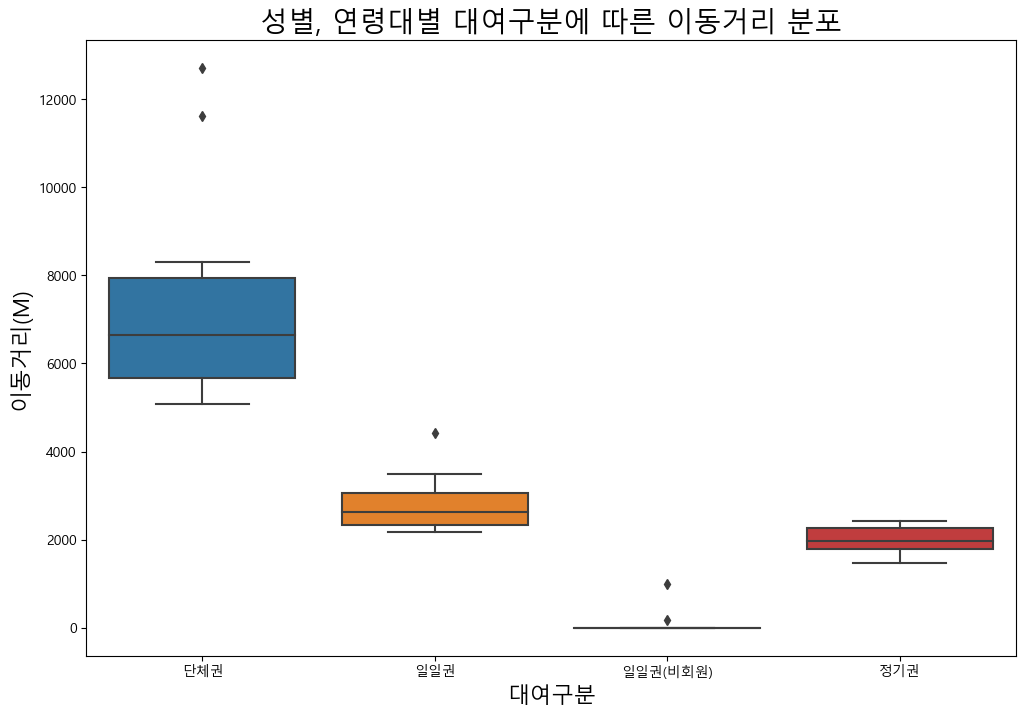

In [35]:

# 결측값 0으로 채우기
pivotData = pivotData.fillna(value={'일일권(비회원)':0}, axis=0, inplace=False)

# 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 사이즈 설정
plt.figure(figsize=(12, 8))

# box plot 그리기
sns.boxplot(data=pivotData)

# x축, y축, 타이틀 설정
plt.xlabel('대여구분', fontsize=16)
plt.ylabel('이동거리(M)', fontsize=16)
plt.title('성별, 연령대별 대여구분에 따른 이동거리 분포', fontsize=20)

# 그래프 출력
plt.show()

In [36]:
# MultiIndex를 SingleIndex로 변경하기
outer_index = pivotData.index.get_level_values(0)
outer_index = pd.Index(['여자' if idx=='F' else '남자' for idx in outer_index]) #lsit complination


inner_index = pivotData.index.get_level_values(1)
outer_index, inner_index

newindex = outer_index + '_' + inner_index
pivotData.index = newindex
pivotData

대여구분,단체권,일일권,일일권(비회원),정기권
여자_10대,5907.299667,2607.400780,0.00,1478.022986
여자_20대,5087.969041,2179.048085,186.48,1679.520612
여자_30대,5531.650101,2311.915095,0.00,1879.164825
여자_40대,5625.375422,2681.112290,0.00,2024.861026
여자_50대,7787.661579,3298.468275,0.00,2216.686514
여자_60대,11610.062857,3486.910346,0.00,2390.917418
여자_70대이상,12711.418000,2276.105714,0.00,1825.675523
남자_10대,6328.857525,2567.999023,0.00,1663.893932
남자_20대,5820.203661,2330.573396,0.00,1783.677256
남자_30대,5208.380909,2358.312119,990.00,1916.021646


In [37]:
# 일일권 과 일일권(비회원)을 합쳐서 일일권에 묶습니다.
pivotData['일일권'] = pivotData['일일권'] + pivotData['일일권(비회원)']
pivotData = pivotData.drop('일일권(비회원)', axis = 1)
pivotData

대여구분,단체권,일일권,정기권
여자_10대,5907.299667,2607.400780,1478.022986
여자_20대,5087.969041,2365.528085,1679.520612
여자_30대,5531.650101,2311.915095,1879.164825
여자_40대,5625.375422,2681.112290,2024.861026
여자_50대,7787.661579,3298.468275,2216.686514
여자_60대,11610.062857,3486.910346,2390.917418
여자_70대이상,12711.418000,2276.105714,1825.675523
남자_10대,6328.857525,2567.999023,1663.893932
남자_20대,5820.203661,2330.573396,1783.677256
남자_30대,5208.380909,3348.312119,1916.021646


In [38]:
womanidx = [item for item in pivotData.index if item.startswith('여자')] 
woman = pivotData.loc[womanidx]
woman #여자들 정보

대여구분,단체권,일일권,정기권
여자_10대,5907.299667,2607.400780,1478.022986
여자_20대,5087.969041,2365.528085,1679.520612
여자_30대,5531.650101,2311.915095,1879.164825
여자_40대,5625.375422,2681.112290,2024.861026
여자_50대,7787.661579,3298.468275,2216.686514
여자_60대,11610.062857,3486.910346,2390.917418
여자_70대이상,12711.418000,2276.105714,1825.675523


In [39]:
manidx = [item for item in pivotData.index if item.startswith('남자')] 
man = pivotData.loc[manidx]
man #남자들 정보

대여구분,단체권,일일권,정기권
남자_10대,6328.857525,2567.999023,1663.893932
남자_20대,5820.203661,2330.573396,1783.677256
남자_30대,5208.380909,3348.312119,1916.021646
남자_40대,6952.513574,2633.431280,2220.414723
남자_50대,7183.578906,2836.519067,2349.780068
남자_60대,8296.971000,3119.340218,2418.007055
남자_70대이상,7991.295000,4428.399887,2291.595306


<h2><font color="red">국내 축구선수에 대한 데이터 분석</font></h2>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

np.random.seed(42)

# 선수명
players = ['이청용', '손흥민', '박지성', '황희찬', '기성용', '박주영', '김영권', '박주호', '이승우', '백승호']

# 소속팀
teams = ['FC서울', '토트넘', '맨유', '울버햄튼', '볼티모어', '수원삼성', '강원FC', '울산현대', '포항스틸러스', '대구FC']

# 포지션
positions = ['FW', 'MF', 'MF', 'FW', 'DF', 'MF', 'MF', 'DF', 'MF', 'FW']

# 출생지
birthplaces = ['서울', '전남 고흥', '경북 안동', '경남 창원', '경북 구미', '경기 파주', '전북 군산', '서울', '서울', '경북 구미']

# 키(cm)
heights = np.random.randint(170, 200, size=10)

# 몸무게(kg)
weights = np.random.randint(60, 90, size=10)

# 연봉(억원)
salaries = np.round(np.random.uniform(1, 10, size=10), 1)

# 득점
goals = np.random.randint(0, 30, size=10)

# 어시스트
assists = np.random.randint(0, 30, size=10)

# 승리
wins = np.random.randint(0, 20, size=10)

df1 = pd.DataFrame({'선수명': players,
                   '소속팀': teams,
                   '포지션': positions,
                   '출생지': birthplaces,
                   '키(cm)': heights,
                   '몸무게(kg)': weights,
                   '연봉(억원)': salaries,
                   '득점': goals,
                   '어시스트': assists,
                   '승리': wins})

df1

,선수명,소속팀,포지션,출생지,키(cm),몸무게(kg),연봉(억원),득점,어시스트,승리
0,이청용,FC서울,FW,서울,176,78,1.2,26,18,8
1,손흥민,토트넘,MF,전남 고흥,189,82,9.7,9,11,6
2,박지성,맨유,MF,경북 안동,198,70,8.5,27,22,17
3,황희찬,울버햄튼,FW,경남 창원,184,70,2.9,27,19,3
4,기성용,볼티모어,DF,경북 구미,180,83,2.6,15,24,13
5,박주영,수원삼성,MF,경기 파주,177,80,2.7,14,2,17
6,김영권,강원FC,MF,전북 군산,198,63,3.7,29,4,8
7,박주호,울산현대,DF,서울,190,67,5.7,29,18,1
8,이승우,포항스틸러스,MF,서울,176,83,4.9,14,6,19
9,백승호,대구FC,FW,경북 구미,195,62,3.6,29,20,14


In [54]:
df1.columns

Index(['지역', '선수 수'], dtype='object')

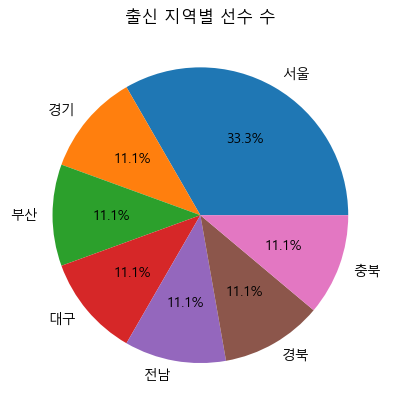

In [55]:
df1 = pd.DataFrame({'지역': ['서울', '경기', '부산', '대구', '전남', '경북', '충북'],
                   '선수 수': [3, 1, 1, 1, 1, 1, 1]})

plt.rc('font', family='Malgun Gothic')
plt.pie(df1['선수 수'], labels=df1['지역'], autopct='%.1f%%')
plt.title('출신 지역별 선수 수')
plt.show()

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      7 non-null      object
 1   선수 수    7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [50]:
df1.isnull().sum()

지역      0
선수 수    0
dtype: int64

In [51]:
df1.describe()

,선수 수
count,7.000000
mean,1.285714
std,0.755929
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000
